In [1]:
#importação biblioteca Arvore de Decisão
from sklearn.tree import DecisionTreeClassifier


In [2]:
#importação biblioteca Arvore de Decisão
from sklearn.tree import DecisionTreeClassifier


In [5]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

#Divisão das bases para treinamento e para teste
from sklearn.model_selection import train_test_split

In [6]:
titanic = pd.read_csv('titanic.csv')

In [30]:
titanic

,Unnamed: 0,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,N,3,male,22.000000,1,0,7.2500,S
1,2,Y,1,female,38.000000,1,0,71.2833,C
2,3,Y,3,female,26.000000,0,0,7.9250,S
3,4,Y,1,female,35.000000,1,0,53.1000,S
4,5,N,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,N,2,male,27.000000,0,0,13.0000,S
887,888,Y,1,female,19.000000,0,0,30.0000,S
888,889,N,3,female,29.699118,1,2,23.4500,S
889,890,Y,1,male,26.000000,0,0,30.0000,C


In [31]:
x_titanic = titanic.iloc[:, 2:9].values

In [32]:
x_titanic

array([[3, 'male', 22.0, ..., 0, 7.25, 'S'],
       [1, 'female', 38.0, ..., 0, 71.2833, 'C'],
       [3, 'female', 26.0, ..., 0, 7.925, 'S'],
       ...,
       [3, 'female', 29.6991176470588, ..., 2, 23.45, 'S'],
       [1, 'male', 26.0, ..., 0, 30.0, 'C'],
       [3, 'male', 32.0, ..., 0, 7.75, 'Q']], dtype=object)

In [34]:
x_titanic[:,6]

array(['S', 'C', 'S', 'S', 'S', 'Q', 'S', 'S', 'S', 'C', 'S', 'S', 'S',
       'S', 'S', 'S', 'Q', 'S', 'S', 'C', 'S', 'S', 'Q', 'S', 'S', 'S',
       'C', 'S', 'Q', 'S', 'C', 'C', 'Q', 'S', 'C', 'S', 'C', 'S', 'S',
       'C', 'S', 'S', 'C', 'C', 'Q', 'S', 'Q', 'Q', 'C', 'S', 'S', 'S',
       'C', 'S', 'C', 'S', 'S', 'C', 'S', 'S', 'C', 'S', 'S', 'S', 'C',
       'C', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'C', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'Q', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'C', 'C', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'Q', 'S', 'C', 'S', 'S', 'C', 'S', 'Q',
       'S', 'C', 'S', 'S', 'S', 'C', 'S', 'S', 'C', 'Q', 'S', 'C', 'S',
       'C', 'S', 'S', 'S', 'S', 'C', 'S', 'S', 'S', 'C', 'C', 'S', 'S',
       'Q', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'C',
       'Q', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'Q', 'S', 'S', 'C', 'S', 'S', 'C', 'S', 'S', 'S

In [36]:
#*Padronizar as variaveis preditoras

labelencoder = LabelEncoder()

x_titanic[:,1] = labelencoder.fit_transform(x_titanic[:,1])
x_titanic[:,6] = labelencoder.fit_transform(x_titanic[:,6])



In [38]:
x_titanic[:,6]

array([2, 0, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2,
       1, 2, 2, 2, 0, 2, 1, 2, 0, 0, 1, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0,
       1, 2, 1, 1, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 0, 2, 2, 0, 2, 1, 2, 0, 2, 2, 2, 0, 2, 2, 0, 1, 2, 0, 2, 0, 2,
       2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2,
       2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 0, 0, 1, 2,
       1, 2, 2, 2, 2, 0, 2, 2, 2, 0, 1, 0, 2, 2, 2, 2, 1, 0, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1,
       2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 0,
       2, 2, 2, 1, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 1,

In [39]:
x_titanic

array([[3, 2, 22.0, ..., 0, 7.25, 2],
       [1, 0, 38.0, ..., 0, 71.2833, 0],
       [3, 2, 26.0, ..., 0, 7.925, 2],
       ...,
       [3, 2, 29.6991176470588, ..., 2, 23.45, 2],
       [1, 0, 26.0, ..., 0, 30.0, 0],
       [3, 1, 32.0, ..., 0, 7.75, 1]], dtype=object)

In [40]:
y_titanic = titanic.iloc[:,1:2].values

In [41]:
y_titanic

array([['N'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['N'],
       ['N'],
       ['N'],
       ['N'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['N'],
       ['N'],
       ['N'],
       ['Y'],
       ['N'],
       ['Y'],
       ['N'],
       ['Y'],
       ['N'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['N'],
       ['Y'],
       ['N'],
       ['N'],
       ['Y'],
       ['N'],
       ['N'],
       ['Y'],
       ['Y'],
       ['N'],
       ['N'],
       ['N'],
       ['Y'],
       ['N'],
       ['N'],
       ['Y'],
       ['N'],
       ['N'],
       ['N'],
       ['Y'],
       ['Y'],
       ['N'],
       ['N'],
       ['Y'],
       ['N'],
       ['N'],
       ['N'],
       ['N'],
       ['Y'],
       ['Y'],
       ['N'],
       ['Y'],
       ['Y'],
       ['N'],
       ['Y'],
       ['N'],
       ['N'],
       ['Y'],
       ['N'],
       ['N'],
       ['N'],
       ['Y'],
       ['Y'],
       ['N'],
       ['Y'],
       ['N'],
       ['N'],
      

In [42]:
x_titanic_treinamento, x_titanic_teste, y_titanic_treinamento, y_titanic_teste = train_test_split(x_titanic, y_titanic, test_size = 0.25, random_state=0)

In [43]:
arvore_titanic = DecisionTreeClassifier(criterion ='entropy')
arvore_titanic .fit( x_titanic_treinamento, y_titanic_treinamento)

DecisionTreeClassifier(criterion='entropy')

In [44]:
#Este código retorna a importancia de ganho de informação de cada variavel x(preditoras)
arvore_titanic.feature_importances_

array([0.09538062, 0.02440948, 0.37986292, 0.0679814 , 0.05790392,
       0.36823174, 0.00622991])

In [45]:
from matplotlib import pyplot as plt

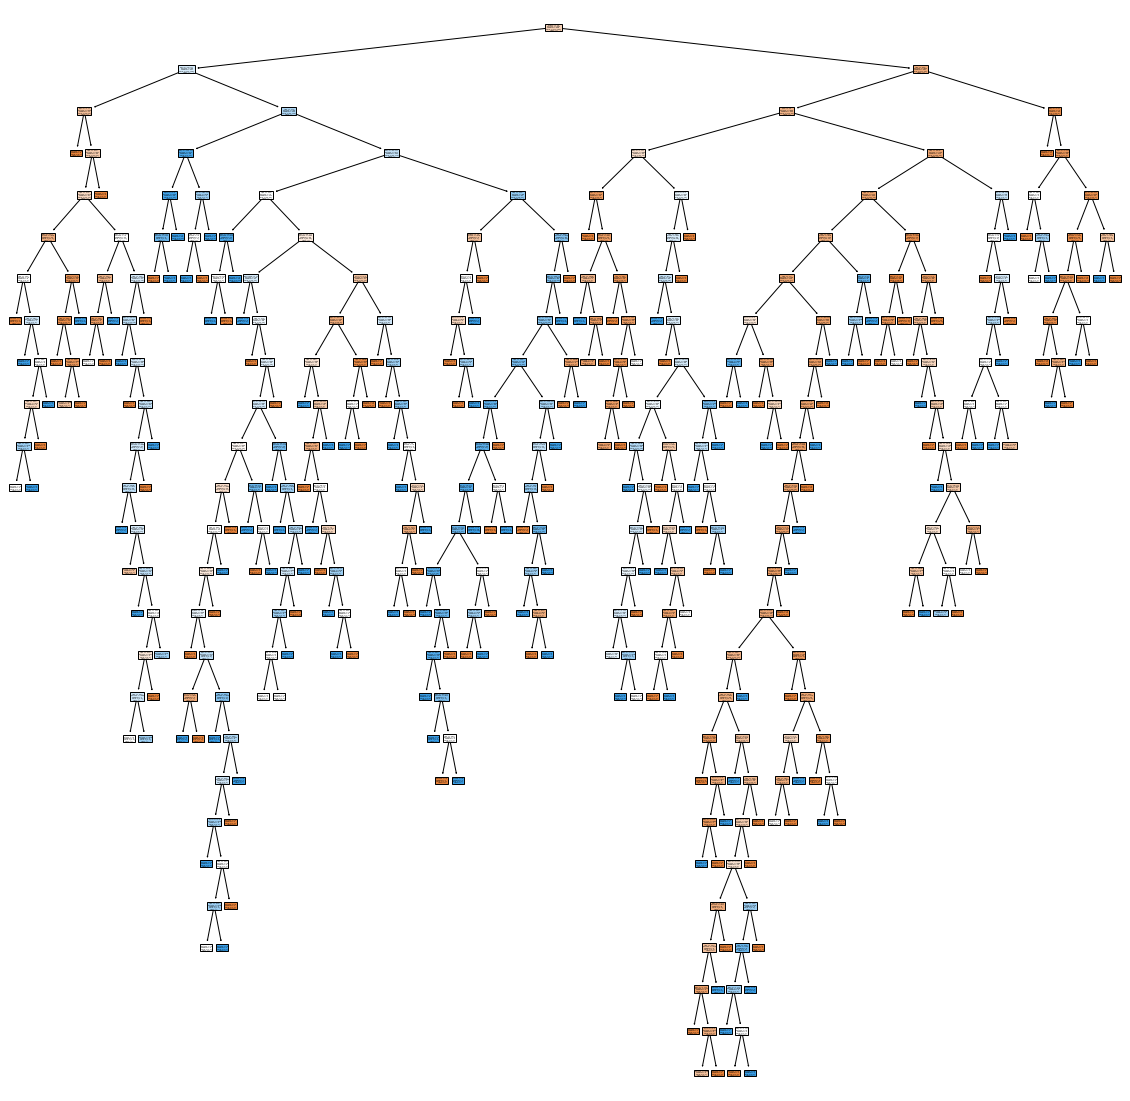

In [46]:
#Gerar a visualização da árvore de decisão (Formato de texto)
from sklearn import tree
#colocar o nome dos atributos na árvore para ficar mais fácil a compreensão
previsores = ['Pclass', 'Sex', 'Age', 'SibSp','Parch', 'Fare','Embarked']
#aumentar o tamanho da arvore de decisão
figura, eixos = plt.subplots (nrows=1, ncols=1, figsize=(20,20))
tree.plot_tree(arvore_titanic, feature_names=previsores, class_names=arvore_titanic.classes_, filled=True);

In [47]:
previsoes = arvore_titanic.predict(x_titanic_teste)
previsoes

array(['N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y',
       'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y',
       'Y', 'N', 'N', 'N', 'N', 'N', 'N', 'Y', 'N', 'N', 'Y', 'N', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N',
       'N', 'Y', 'Y', 'N', 'N', 'N', 'N', 'N', 'Y', 'N', 'N', 'Y', 'N',
       'N', 'Y', 'N', 'N', 'N', 'N', 'N', 'Y', 'Y', 'N', 'N', 'N', 'Y',
       'N', 'N', 'Y', 'N', 'N', 'N', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'N',
       'Y', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'Y', 'N', 'N', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y', 'N',
       'N', 'N', 'N', 'N', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'N', 'N', 'Y', 'Y', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'Y', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'Y', 'N', 'N', 'N', 'N

In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [49]:
accuracy_score(y_titanic_teste, previsoes)

0.6547085201793722

In [50]:
from yellowbrick.classifier import ConfusionMatrix

0.6547085201793722

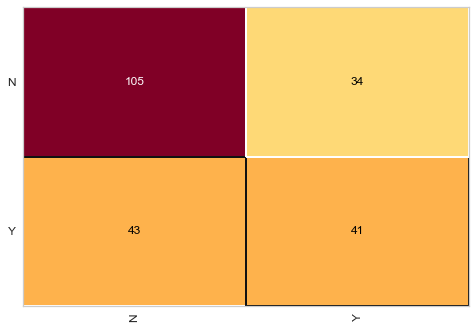

In [51]:
cm = ConfusionMatrix(arvore_titanic)
cm.fit(x_titanic_treinamento, y_titanic_treinamento)
cm.score(x_titanic_teste, y_titanic_teste)